# Modelos de regresión lineal

## Modelo con datos simulados
y = a +b*x
x = 100 valores distribuidos según una b(1.5, 2.5)
Ye = 4 + 2.7* x + e
e será una distribución normal n(0, 0,8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.26 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 4 + 2.7 * x

In [5]:
y_act =  4 + 2.7 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y":y_act_list,
        "y_prediccion":y_pred_list
    }

)

In [8]:
data.head()

,x,y,y_prediccion
0,3.001514,11.359032,12.104087
1,1.925075,10.014894,9.197702
2,2.411327,10.983174,10.510582
3,1.666408,8.543446,8.499301
4,4.245615,16.944081,15.463160


In [9]:
import matplotlib.pyplot as plt


In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) +  1)]

Text(0.5, 1.0, 'Valor actual vs predicción')

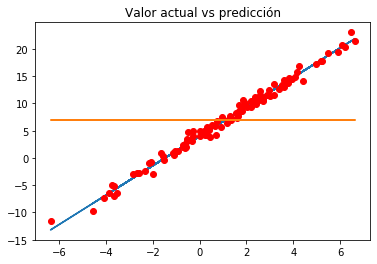

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean)
plt.title("Valor actual vs predicción")

In [12]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y"])**2
data["SST"] = (data["y"]-np.mean(y_act))**2


In [13]:
data.head()

,x,y,y_prediccion,SSR,SSD,SST
0,3.001514,11.359032,12.104087,27.209630,0.555107,19.991899
1,1.925075,10.014894,9.197702,5.335639,0.667802,9.778703
2,2.411327,10.983174,10.510582,13.124537,0.223343,16.772072
3,1.666408,8.543446,8.499301,2.596929,0.001949,2.741159
4,4.245615,16.944081,15.463160,73.536773,2.193126,101.128746


In [14]:
SSR = sum(data["SSR"]) 
SSD = sum(data["SSD"])
SST = sum(data["SST"])
R2= SSR / SST

In [15]:
R2

1.0083892446476046

(array([ 2.,  5.,  9., 14., 15., 21., 19.,  9.,  3.,  3.]),
 array([-2.03822799, -1.6558934 , -1.27355882, -0.89122423, -0.50888964,
        -0.12655506,  0.25577953,  0.63811412,  1.0204487 ,  1.40278329,
         1.78511788]),
 <a list of 10 Patch objects>)

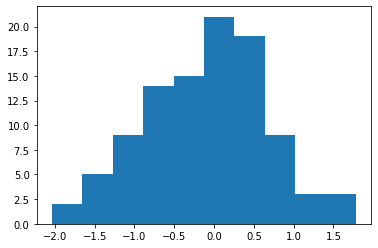

In [16]:
plt.hist(data["y_prediccion"]-data["y"])

## Obteniendo la recta de regresión

* y = a + b * x 
* b = sum(xi - x_m) * (y_i-y_m) / sum ((xi - x_m)^2)
* a = y_m -b * x_m


In [17]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(1.0362053567838638, 6.887801786664027)

In [18]:
data["beta_numerador"] = (data["x"] - x_mean) * (data["y"] - y_mean)  
data["beta_denominador"] = (data["x"] - x_mean) ** 2

In [19]:
beta = sum(data["beta_numerador"]) / sum(data["beta_denominador"])


In [20]:
alpha = y_mean - beta * x_mean

In [21]:
alpha, beta

(4.117550847171879, 2.6734574583655415)

In [22]:
data["y_model"] = alpha + beta * data["x"]

In [23]:
data.head()

,x,y,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,y_model
0,3.001514,11.359032,12.104087,27.209630,0.555107,19.991899,8.787346,3.862437,12.141970
1,1.925075,10.014894,9.197702,5.335639,0.667802,9.778703,2.779576,0.790089,9.264156
2,2.411327,10.983174,10.510582,13.124537,0.223343,16.772072,5.631634,1.890959,10.564130
3,1.666408,8.543446,8.499301,2.596929,0.001949,2.741159,1.043391,0.397155,8.572621
4,4.245615,16.944081,15.463160,73.536773,2.193126,101.128746,32.274718,10.300310,15.468022


In [24]:
SSR_MODEL = sum((data["y_model"] - y_mean)**2)
SSD_MODEL = sum((data["y_model"]-data["y"])**2)
SST_MODEL = sum((data["y"]-y_mean)**2)

In [25]:
SSR_MODEL, SSD_MODEL, SST_MODEL

(5181.818676003134, 60.23669083988495, 5242.055366843025)

In [26]:
R2_model = SSR_MODEL / SST_MODEL

In [27]:
R2, R2_model

(1.0083892446476046, 0.9885089556243722)

In [28]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) +  1)]

Text(0.5, 1.0, 'Valor actual vs predicción')

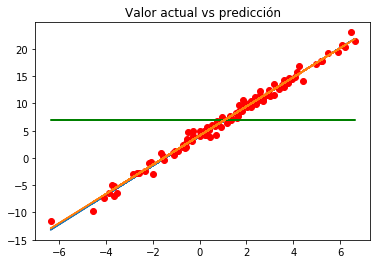

In [29]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor actual vs predicción")

## Error estandar de los residuos RSE

In [32]:
RSE = np.sqrt(SSD_MODEL/ (len(data)-2))
RSE

0.7840026215588

In [33]:
np.mean(data["y"])

6.887801786664027

In [37]:
Porcentaje_error = RSE/ np.mean(data["y"])
print ("El porcentaje de error es:")  
Porcentaje_error

El porcentaje de error es:


0.11382479430182854